MNIST digit recognition
=============

Kaggle competition tutorial
------------

Deep learning with Keras

Use Python 3.6

---
Load libraries
---------

---

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

test.csv
train.csv



---
Import data
---------

---

In [64]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("./input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test= pd.read_csv("./input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_train = (train.ix[:,1:].values).astype('float32') # all pixel values
y_train = train.ix[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [68]:
X_train.shape

(42000, 784)

In [69]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

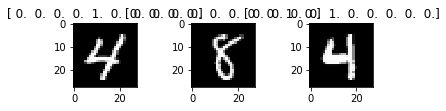

In [88]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [89]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(21504, 28, 28, 1)

In [90]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

---
Preprocessing images
---------

---

In [82]:
# Feature standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px
X_train = standardize(X_train)
X_test = standardize(X_test)

In [83]:
# One-hot encoding the digit classes
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

---
Design neural network architechture
---------

---

In [72]:
# fix random seed for reproducibility
seed = 20
np.random.seed(seed)

In [84]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

## Linear Model
- Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.
- In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first)
- Flatten will transform input into 1D array.
- Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [30]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [45]:
# Compile network
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.01),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [91]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=20)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

history=model.fit_generator(batches, batches.n, nb_epoch=5, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 17203, validation_data=<keras.pre..., epochs=5, validation_steps=4301)`


Epoch 1/5
  817/17203 [>.............................] - ETA: 100s - loss: 8.7064 - acc: 0.3020  

KeyboardInterrupt: 

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

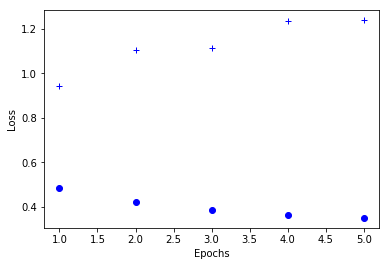

In [40]:
# Plot loss and epoch graph
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

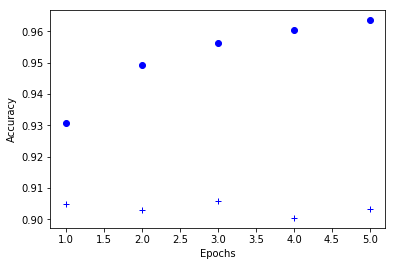

In [41]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

---
Submission
---------

---

In [42]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

## Deep MLP

In [76]:
input_dim = X_train.shape[1]
nb_classes = 10

model1 = Sequential()
model1.add(Dense(128, input_dim=input_dim))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))

model1.compile(optimizer=RMSprop(lr=0.01),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [77]:
model1.fit(X_train, y_train, nb_epoch=20, batch_size=64, validation_split=0.15, verbose=2)

//anaconda/envs/py36/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 35700 samples, validate on 6300 samples
Epoch 1/20
2s - loss: 0.7193 - acc: 0.8284 - val_loss: 0.3931 - val_acc: 0.9149
Epoch 2/20
2s - loss: 0.4938 - acc: 0.8915 - val_loss: 0.3107 - val_acc: 0.9275
Epoch 3/20
2s - loss: 0.4751 - acc: 0.9011 - val_loss: 0.4568 - val_acc: 0.9248
Epoch 4/20
2s - loss: 0.5131 - acc: 0.9063 - val_loss: 0.3401 - val_acc: 0.9406
Epoch 5/20
2s - loss: 0.5206 - acc: 0.9082 - val_loss: 0.4149 - val_acc: 0.9319
Epoch 6/20
2s - loss: 0.5574 - acc: 0.9097 - val_loss: 0.4831 - val_acc: 0.9122
Epoch 7/20
2s - loss: 0.5812 - acc: 0.9128 - val_loss: 0.4849 - val_acc: 0.9365
Epoch 8/20
2s - loss: 0.6023 - acc: 0.9161 - val_loss: 0.4299 - val_acc: 0.9386
Epoch 9/20
2s - loss: 0.6525 - acc: 0.9176 - val_loss: 0.5501 - val_acc: 0.9365
Epoch 10/20
2s - loss: 0.6114 - acc: 0.9199 - val_loss: 0.5794 - val_acc: 0.9370
Epoch 11/20
2s - loss: 0.6621 - acc: 0.9191 - val_loss: 0.5904 - val_acc: 0.9337
Epoch 12/20
2s - loss: 0.6355 - acc: 0.9237 - val_loss: 0.5644 - val_

In [78]:
predictions = model1.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("MLP.csv", index=False, header=True)

## CNN

In [80]:
from keras.layers import Conv2D, MaxPooling2D

batch_size = 128
num_classes = 10
epochs = 12
input_shape = (28,28,1)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=20)
model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print(score)

Train on 13762 samples, validate on 3441 samples
Epoch 1/12
13762/13762 [==============================] - 23s - loss: 0.9167 - acc: 0.7960 - val_loss: 0.1959 - val_acc: 0.9410

In [93]:
predictions = model2.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("CNN.csv", index=False, header=True)